In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []
 
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
 
# Create counters
record_count = 1
set_count = 1
 
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
 
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="+city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
 
    # Add 1 to the record count
    record_count += 1
 
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
 
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
 
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | jiroft
City not found. Skipping...
Processing Record 4 of Set 1 | moron
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | aklavik
Processing Record 7 of Set 1 | jangaon
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | requena
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | catamarca
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | pangnirtung
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | nara
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | demba
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | biltine
Processing Record 22 of Set 1 | sur
Processing Record 23 of Set

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [8]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,12.89,87,66,1.97,CL,1667516971
1,punta arenas,-53.1500,-70.9167,16.06,63,40,10.80,CL,1667516888
2,moron,-34.6534,-58.6198,19.98,58,0,5.27,AR,1667516972
3,san patricio,28.0170,-97.5169,27.92,74,31,7.08,US,1667516972
4,aklavik,68.2191,-135.0107,-12.00,79,100,3.60,CA,1667516972


In [9]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        563 non-null    object 
 1   Lat         563 non-null    float64
 2   Lng         563 non-null    float64
 3   Max Temp    563 non-null    float64
 4   Humidity    563 non-null    int64  
 5   Cloudiness  563 non-null    int64  
 6   Wind Speed  563 non-null    float64
 7   Country     563 non-null    object 
 8   Date        563 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.7+ KB


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,12.89,87,66,1.97,CL,1667516971
1,punta arenas,-53.1500,-70.9167,16.06,63,40,10.80,CL,1667516888
2,moron,-34.6534,-58.6198,19.98,58,0,5.27,AR,1667516972
3,san patricio,28.0170,-97.5169,27.92,74,31,7.08,US,1667516972
4,aklavik,68.2191,-135.0107,-12.00,79,100,3.60,CA,1667516972


In [12]:
lat_temp = city_data_df
lat_temp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,12.89,87,66,1.97,CL,1667516971
1,punta arenas,-53.1500,-70.9167,16.06,63,40,10.80,CL,1667516888
2,moron,-34.6534,-58.6198,19.98,58,0,5.27,AR,1667516972
3,san patricio,28.0170,-97.5169,27.92,74,31,7.08,US,1667516972
4,aklavik,68.2191,-135.0107,-12.00,79,100,3.60,CA,1667516972
...,...,...,...,...,...,...,...,...,...
558,skelleftea,64.7507,20.9528,6.67,100,100,3.09,SE,1667517252
559,uray,60.1247,64.7758,-0.68,87,84,1.66,RU,1667517252
560,marabba,12.3500,32.1833,27.17,20,58,6.12,SD,1667517253


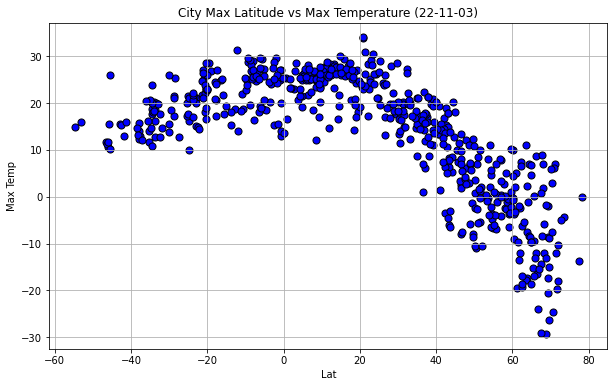

In [13]:
# Build scatter plot for latitude vs. temperature

#Markersize
sizes = [50]

lat_temp.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(10,6), marker = "o", sizes = sizes, c = "blue", edgecolors="black") 

plt.title(f"City Max Latitude vs Max Temperature ({datetime.now():%y-%m-%d})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

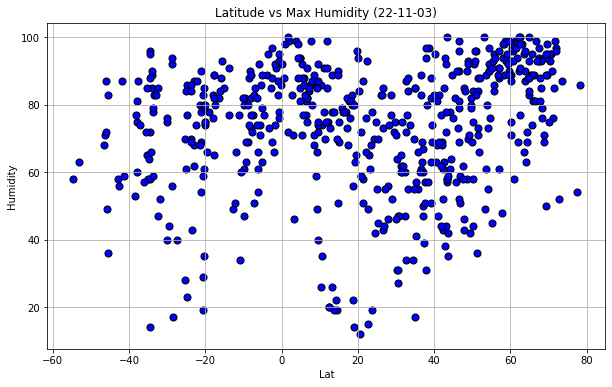

In [14]:
# Build scatter plot for latitude vs. Humidity

#Markersize
sizes = [50]

lat_temp.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(10,6), marker = "o", sizes=sizes, c="blue", edgecolors='black')

plt.title(f"Latitude vs Max Humidity ({datetime.now():%y-%m-%d})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

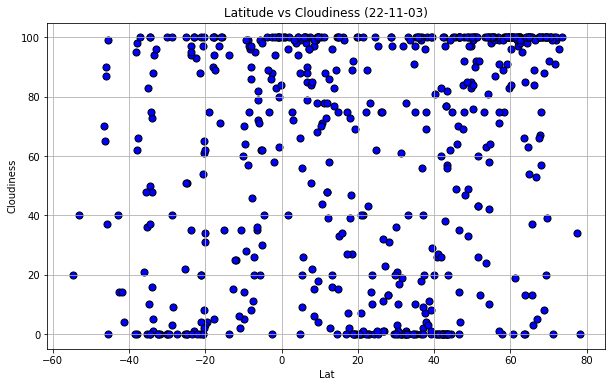

In [15]:
# Build scatter plot for latitude vs. Cloudiness

#Markersize
sizes = [50]

lat_temp.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(10,6), marker = "o", sizes =sizes, c="blue", edgecolors='black')

plt.title(f"Latitude vs Cloudiness ({datetime.now():%y-%m-%d})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

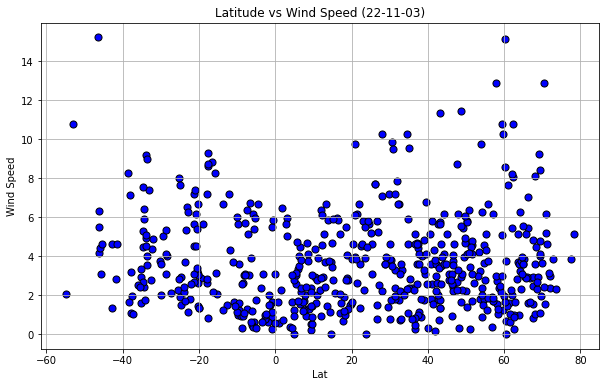

In [16]:
# Build scatter plot for latitude vs. Wind Speed

#Markersize
sizes = [50]

lat_temp.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(10,6), marker = "o", sizes=sizes, c="blue", edgecolors='black')

plt.title(f"Latitude vs Wind Speed ({datetime.now():%y-%m-%d})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [17]:
north_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,san patricio,28.0170,-97.5169,27.92,74,31,7.08,US,1667516972
4,aklavik,68.2191,-135.0107,-12.00,79,100,3.60,CA,1667516972
5,jangaon,17.7167,79.1833,20.72,81,2,0.65,IN,1667516973
6,georgetown,5.4112,100.3354,25.96,92,20,2.57,MY,1667516682
7,requena,39.4883,-1.1004,15.99,69,100,6.80,ES,1667516973


In [18]:
x_values_north_lat = north_hemi_df['Lat']
y_values_north_temp = north_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north_lat, y_values_north_temp)

# Get regression values
regress_values_north_temp = x_values_north_lat * slope + intercept
print(regress_values_north_temp)

City_ID
3      16.693708
4      -6.569219
5      22.653972
6      29.774544
7      10.055846
         ...    
555    16.308039
556    32.875875
558    -4.562231
559    -1.885398
560    25.759411
Name: Lat, Length: 400, dtype: float64


In [19]:
# Create line equation string
line_eq_north_temp = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_north_temp)

y = -0.58x +32.91


# Northern Hemisphere: Temperature vs. Latitude

The r-value is: 0.738817576189507


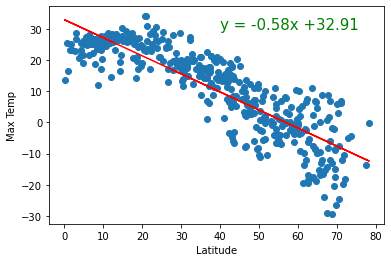

In [20]:
# Create Plot
plt.scatter(x_values_north_lat,y_values_north_temp)
plt.plot(x_values_north_lat,regress_values_north_temp,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_north_temp,(40,30),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [21]:
south_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,12.89,87,66,1.97,CL,1667516971
1,punta arenas,-53.1500,-70.9167,16.06,63,40,10.80,CL,1667516888
2,moron,-34.6534,-58.6198,19.98,58,0,5.27,AR,1667516972
8,ushuaia,-54.8000,-68.3000,14.81,58,20,2.06,AR,1667516974
9,catamarca,-28.4696,-65.7852,25.43,17,9,4.02,AR,1667516974


In [22]:
x_values_south_lat = south_hemi_df['Lat']
y_values_south_temp = south_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south_lat, y_values_south_temp)

# Get regression values
regress_values_south_temp = x_values_south_lat * slope + intercept
print(regress_values_south_temp)

City_ID
0      16.668839
1      13.054905
2      17.358272
8      12.671020
9      18.796978
         ...    
541    23.951080
546    20.690785
557    22.838979
561    23.923883
562    25.377990
Name: Lat, Length: 163, dtype: float64


In [23]:
# Create line equation string
line_eq_south_temp = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_south_temp)

y = 0.23x +25.42


# Southern Hemisphere: Temperature vs. Latitude

The r-value is: 0.35556792360649037


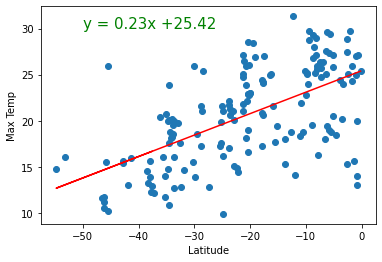

In [27]:
plt.scatter(x_values_south_lat,y_values_south_temp)
plt.plot(x_values_south_lat,regress_values_south_temp,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_south_temp,(-50,30),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [28]:
x_values_north_lat = north_hemi_df['Lat']
y_values_north_hum = north_hemi_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north_lat, y_values_north_hum)

# Get regression values
regress_values_north_hum = x_values_north_lat * slope + intercept
print(regress_values_north_hum)

City_ID
3      71.883395
4      81.142386
5      69.511121
6      66.677028
7      74.525363
         ...    
555    72.036897
556    65.442652
558    80.343574
559    79.278155
560    68.275111
Name: Lat, Length: 400, dtype: float64


In [29]:
# Create line equation string
line_eq_north_hum = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_north_hum)

y = 0.23x +65.43


# Northern Hemisphere: Humidity vs. Latitude

The r-value is: 0.05843228010265938


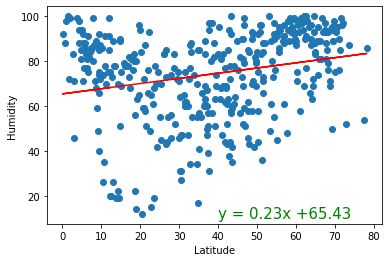

In [31]:
# Create Plot
plt.scatter(x_values_north_lat,y_values_north_hum)
plt.plot(x_values_north_lat,regress_values_north_hum,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_north_hum,(40,10),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [32]:
x_values_south_lat = south_hemi_df['Lat']
y_values_south_hum = south_hemi_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south_lat, y_values_south_hum)

# Get regression values
regress_values_south_hum = x_values_south_lat * slope + intercept
print(regress_values_south_hum)

City_ID
0      66.828749
1      62.037451
2      67.742789
8      61.528503
9      69.650203
         ...    
541    76.483431
546    72.160982
557    75.009024
561    76.447373
562    78.375206
Name: Lat, Length: 163, dtype: float64


In [33]:
# Create line equation string
line_eq_south_hum = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_south_hum)

y = 0.31x +78.43


# Southern Hemisphere: Humidity vs. Latitude

The r-value is: 0.058396156401384694


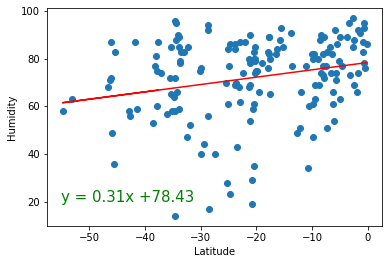

In [37]:
plt.scatter(x_values_south_lat,y_values_south_hum)
plt.plot(x_values_south_lat,regress_values_south_hum,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_south_hum,(-55,20),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [38]:
x_values_north_lat = north_hemi_df['Lat']
y_values_north_cloud = north_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north_lat, y_values_north_cloud)

# Get regression values
regress_values_north_cloud = x_values_north_lat * slope + intercept
print(regress_values_north_cloud)

City_ID
3      58.112512
4      71.201327
5      54.758987
6      50.752619
7      61.847285
         ...    
555    58.329508
556    49.007665
558    70.072101
559    68.565989
560    53.011722
Name: Lat, Length: 400, dtype: float64


In [39]:
# Create line equation string
line_eq_north_cloud = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_north_cloud)

y = 0.33x +48.99


# Northern Hemisphere: Cloudiness vs. Latitude

The r-value is: 0.028580464256656522


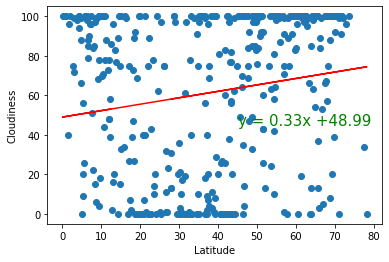

In [44]:
# Create Plot
plt.scatter(x_values_north_lat,y_values_north_cloud)
plt.plot(x_values_north_lat,regress_values_north_cloud,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_north_cloud,(45,45),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [45]:
x_values_south_lat = south_hemi_df['Lat']
y_values_south_cloud = south_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south_lat, y_values_south_cloud)

# Get regression values
regress_values_south_cloud = x_values_south_lat * slope + intercept
print(regress_values_south_cloud)

City_ID
0      40.986801
1      30.107306
2      43.062291
8      28.951649
9      47.393413
         ...    
541    62.909474
546    53.094585
557    59.561571
561    62.827598
562    67.205086
Name: Lat, Length: 163, dtype: float64


In [46]:
# Create line equation string
line_eq_south_cloud = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_south_cloud)

y = 0.7x +67.33


# Southern Hemisphere: Cloudiness vs. Latitude

The r-value is: 0.058973725151762656


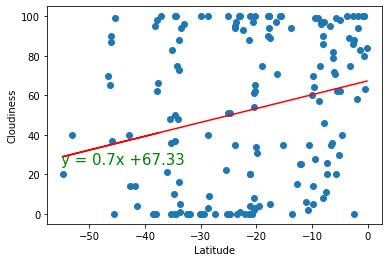

In [48]:
plt.scatter(x_values_south_lat,y_values_south_cloud)
plt.plot(x_values_south_lat,regress_values_south_cloud,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_south_cloud,(-55,25),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [49]:
x_values_north_lat = north_hemi_df['Lat']
y_values_north_wind = north_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north_lat, y_values_north_wind)

# Get regression values
regress_values_north_wind = x_values_north_lat * slope + intercept
print(regress_values_north_wind)

City_ID
3      3.352747
4      3.985515
5      3.190624
6      2.996940
7      3.533302
         ...   
555    3.363238
556    2.912581
558    3.930923
559    3.858111
560    3.106154
Name: Lat, Length: 400, dtype: float64


In [50]:
# Create line equation string
line_eq_north_wind = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_north_wind)

y = 0.02x +2.91


# Northern Hemisphere: Wind Speed vs. Latitude

The r-value is: 0.018601645824374013


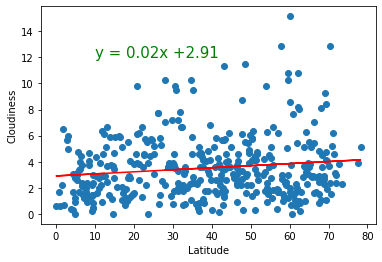

In [52]:
# Create Plot
plt.scatter(x_values_north_lat,y_values_north_wind)
plt.plot(x_values_north_lat,regress_values_north_wind,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_north_wind,(10,12),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [57]:
x_values_south_lat = south_hemi_df['Lat']
y_values_south_wind = south_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south_lat, y_values_south_wind)

# Get regression values
regress_values_south_wind = x_values_south_lat * slope + intercept
print(regress_values_south_wind)

City_ID
0      4.724265
1      5.647403
2      4.548158
8      5.745462
9      4.180657
         ...   
541    2.864102
546    3.696906
557    3.148175
561    2.871049
562    2.499614
Name: Lat, Length: 163, dtype: float64


In [58]:
# Create line equation string
line_eq_south_wind = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_south_wind)

y = -0.06x +2.49


# Southern Hemisphere: Wind Speed vs. Latitude

The r-value is: 0.09912474282559788


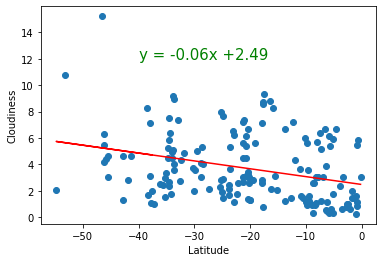

In [61]:
plt.scatter(x_values_south_lat,y_values_south_wind)
plt.plot(x_values_south_lat,regress_values_south_wind,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_south_wind,(-40,12),fontsize=15,color="green")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()